In [1]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [4]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
city_url = base_url + "&q=" + "San Diego"
city_url

'https://api.openweathermap.org/data/2.5/weather?appid=ef39e1941b15368bff3d41d84ca8a9a1&units=imperial&q=San Diego'

In [5]:
 city_weather = requests.get(city_url).json()
city_weather
    

{'coord': {'lon': -117.1573, 'lat': 32.7153},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 61.5,
  'feels_like': 61.3,
  'temp_min': 58.12,
  'temp_max': 64.58,
  'pressure': 1016,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 310},
 'clouds': {'all': 75},
 'dt': 1687758740,
 'sys': {'type': 1,
  'id': 5771,
  'country': 'US',
  'sunrise': 1687696930,
  'sunset': 1687748411},
 'timezone': -25200,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}

In [9]:
# Base URL for the OpenWeatherMap API
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Define an empty list to fetch the weather data for each city
city_data = []

record_count = 1
set_count = 1
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_data_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
# Perform API requests for each city


    
    try:
        city_weather = requests.get(city_data_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        
         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    

        
    # If an error is experienced, skip the city    
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")







Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lucera
Processing Record 2 of Set 1 | tsiombe
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | palmer
Processing Record 13 of Set 1 | annau
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | kharp
Processing Record 18 of Set 1 | sandnessjoen
Processing Record 19 of Set 1 | nar'yan-mar
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | karamay
City not found. Skipping...
Processing 

Processing Record 41 of Set 4 | keflavik
Processing Record 42 of Set 4 | whitehorse
Processing Record 43 of Set 4 | mount pearl
Processing Record 44 of Set 4 | lindi
Processing Record 45 of Set 4 | mahina
Processing Record 46 of Set 4 | santa isabel
Processing Record 47 of Set 4 | moree
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | enewetak
Processing Record 0 of Set 5 | pedra azul
Processing Record 1 of Set 5 | polyarnyy
Processing Record 2 of Set 5 | dudinka
Processing Record 3 of Set 5 | atafu village
Processing Record 4 of Set 5 | afaahiti
Processing Record 5 of Set 5 | west hattiesburg
Processing Record 6 of Set 5 | the bottom
Processing Record 7 of Set 5 | howrah
Processing Record 8 of Set 5 | dhalie
Processing Record 9 of Set 5 | lapua
Processing Record 10 of Set 5 | tura
Processing Record 11 of Set 5 | el porvenir
Processing Record 12 of Set 5 | puerto baquerizo moreno
Processing Record 13 of Set 5 | ambodifotatra
Processing Record 14 of Set 5 | bulaw

Processing Record 30 of Set 8 | cork
Processing Record 31 of Set 8 | vysokovsk
Processing Record 32 of Set 8 | panaba
Processing Record 33 of Set 8 | malabar
Processing Record 34 of Set 8 | gilgit
Processing Record 35 of Set 8 | tazacorte
Processing Record 36 of Set 8 | nakasongola
Processing Record 37 of Set 8 | wolmaransstad
Processing Record 38 of Set 8 | san andres
Processing Record 39 of Set 8 | amursk
Processing Record 40 of Set 8 | barendrecht
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | kiama
Processing Record 43 of Set 8 | pierre
Processing Record 44 of Set 8 | maba
Processing Record 45 of Set 8 | tabou
Processing Record 46 of Set 8 | tarnogskiy gorodok
Processing Record 47 of Set 8 | guapiles
Processing Record 48 of Set 8 | arroyo
Processing Record 49 of Set 8 | san patricio
Processing Record 0 of Set 9 | chinde
Processing Record 1 of Set 9 | vernon
Processing Record 2 of Set 9 | longgang
Processing Record 3 of Set 9 | kavaratti
Processing Record

Processing Record 19 of Set 12 | lexington
Processing Record 20 of Set 12 | junin
Processing Record 21 of Set 12 | sparta
Processing Record 22 of Set 12 | yamba
Processing Record 23 of Set 12 | port arthur
Processing Record 24 of Set 12 | mazagao
Processing Record 25 of Set 12 | bayanaul
Processing Record 26 of Set 12 | pavilosta
Processing Record 27 of Set 12 | buriti dos lopes
Processing Record 28 of Set 12 | santarem
Processing Record 29 of Set 12 | ziguinchor
Processing Record 30 of Set 12 | along
Processing Record 31 of Set 12 | pariyapuram
Processing Record 32 of Set 12 | belen
Processing Record 33 of Set 12 | ujae
Processing Record 34 of Set 12 | encruzilhada do sul
Processing Record 35 of Set 12 | bakanas
Processing Record 36 of Set 12 | soe
Processing Record 37 of Set 12 | tzucacab
Processing Record 38 of Set 12 | whangarei
Processing Record 39 of Set 12 | vadstena
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()



City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lucera,41.5082,15.3351,73.49,53,0,16.11,IT,1687761834
1,tsiombe,-25.3000,45.4833,67.75,55,0,1.74,MG,1687761835
2,lata,40.1629,-8.3327,63.07,70,7,3.20,PT,1687761835
3,kodiak,57.7900,-152.4072,47.71,93,100,10.36,US,1687761835
4,tiksi,71.6872,128.8694,48.07,57,51,5.10,RU,1687761836
...,...,...,...,...,...,...,...,...,...
555,bakanas,44.8081,76.2772,86.49,18,0,6.08,KZ,1687762096
556,soe,-9.8607,124.2840,77.43,61,100,3.15,ID,1687762084
557,tzucacab,20.0667,-89.0500,70.29,96,98,0.98,MX,1687762096


Text(0.5, 1.0, 'City Latitude vs. Humidity')

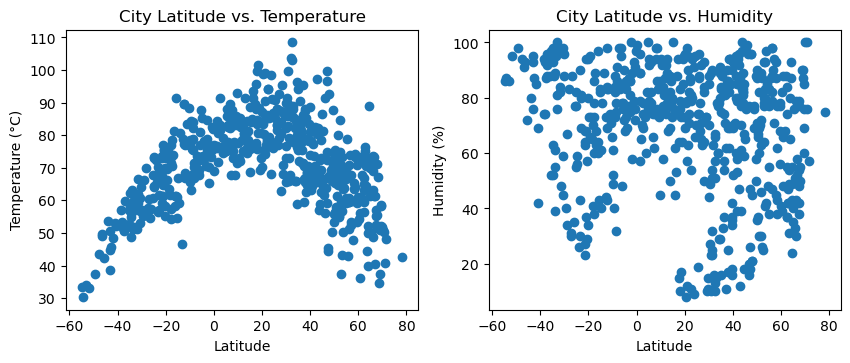

In [17]:
# Create scatter plots
plt.figure(figsize=(10, 8))

# Latitude vs. Temperature
plt.subplot(2, 2, 1)
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.title("City Latitude vs. Temperature")
plt.subplot(2, 2, 2)
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")


Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

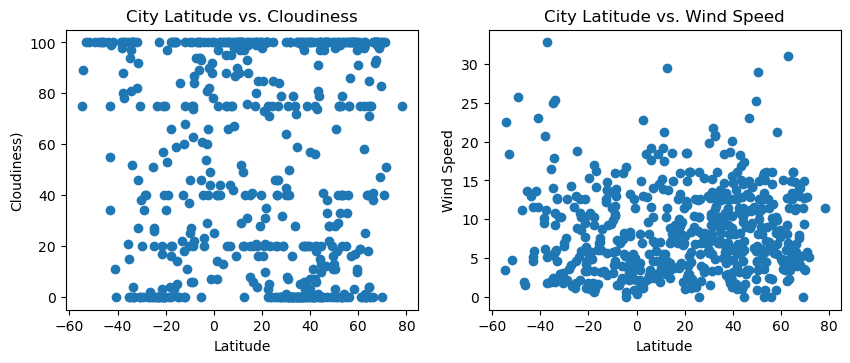

In [18]:
# Create scatter plots
plt.figure(figsize=(10, 8))

# Latitude vs. Temperature
plt.subplot(2, 2, 1)
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
plt.title("City Latitude vs. Cloudiness")
plt.subplot(2, 2, 2)
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

In [32]:
# Create scatter plots with linear regression lines
def plot_regression(x, y, x_label, y_label, hemisphere,figname):
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"City {x_label} vs. {y_label} ({hemisphere} Hemisphere)")

    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = slope * x + intercept

    # Plot the regression line
    plt.plot(x, regress_values, color="red")

    # Add the equation of the line to the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, (x.min(), y.max()), fontsize=12, color="red")

    # Add the r-value to the plot
    r_value_str = f"r = {rvalue:.2f}"
    plt.annotate(r_value_str, (x.min(), y.max() - (y.max() - y.min()) * 0.1), fontsize=12)
    plt.savefig(figname)
    plt.show()

# # Plot regression for Northern Hemisphere (Latitude >= 0) vs. Temperature
# plot_regression(np.array(latitudes)[np.array(latitudes) >= 0], np.array(temperatures)[np.array(latitudes) >= 0],
#                 "Latitude", "Temperature (°C)", "Northern")

# # Plot regression for Southern Hemisphere (Latitude < 0) vs. Temperature
# plot_regression(np.array(latitudes)[np.array(latitudes) < 0], np.array(temperatures)[np.array(latitudes) < 0],
#                 "Latitude", "Temperature (°C)", "Southern")


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lucera,41.5082,15.3351,73.49,53,0,16.11,IT,1687761834
2,lata,40.1629,-8.3327,63.07,70,7,3.20,PT,1687761835
3,kodiak,57.7900,-152.4072,47.71,93,100,10.36,US,1687761835
4,tiksi,71.6872,128.8694,48.07,57,51,5.10,RU,1687761836
5,yellowknife,62.4560,-114.3525,59.56,55,75,9.22,CA,1687761836


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tsiombe,-25.3000,45.4833,67.75,55,0,1.74,MG,1687761835
6,mar del plata,-38.0023,-57.5575,52.09,93,100,20.71,AR,1687761837
9,alice springs,-23.7000,133.8833,65.75,30,75,12.66,AU,1687761838
10,edinburgh of the seven seas,-37.0676,-12.3116,59.95,88,100,32.77,SH,1687761838
14,puerto natales,-51.7236,-72.4875,33.24,95,100,4.79,CL,1687761840


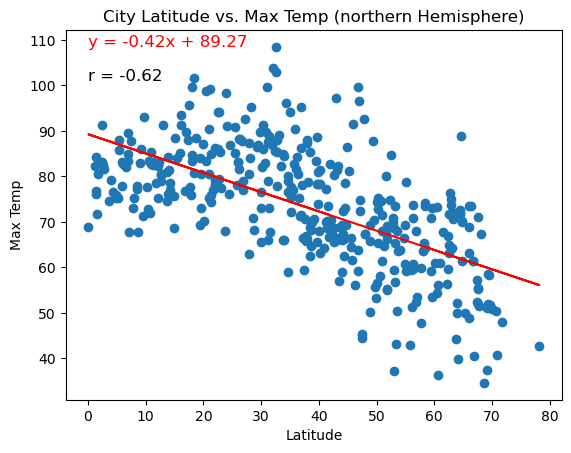

In [35]:
# Create scatter plots with linear regression lines
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Max Temp"]
y_label = "Max Temp"
x_label = "Latitude"
hemisphere = "northern"
figname = "output_data/northernmaxtemp"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

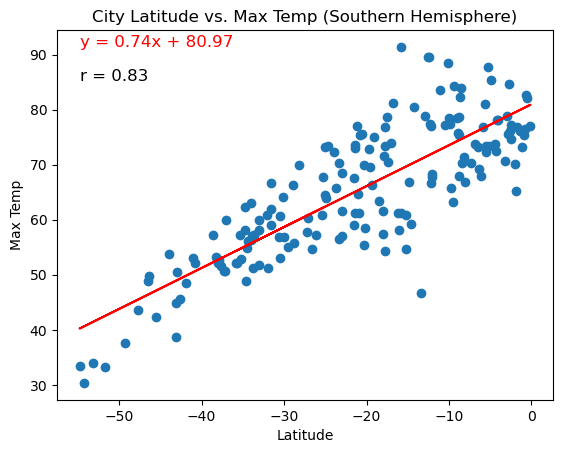

In [36]:
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Max Temp"]
y_label = "Max Temp"
x_label = "Latitude"
hemisphere = "Southern"
figname = "output_data/southernmaxtemp"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

In [ ]:
**Discussion about the linear relationship:**Temperature vs. Latitude: In the Northern Hemisphere, there is a negative correlation between latitude and temperature, indicating that as we move further away from the equator (higher latitude), the temperature tends to decrease. In the Southern Hemisphere, there is a positive correlation, showing that as we move closer to the equator (lower latitude), the temperature tends to increase.

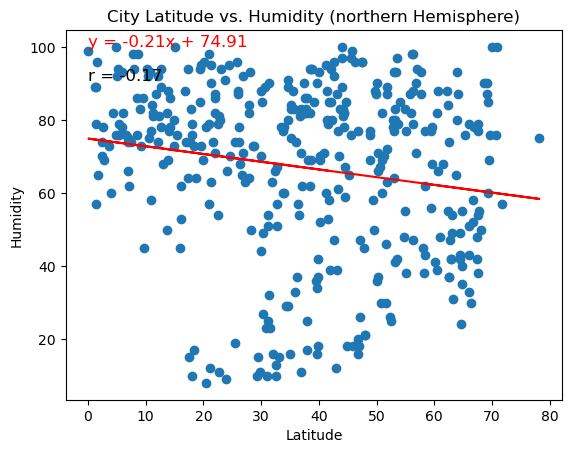

In [37]:
# Create scatter plots with linear regression lines
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Humidity"]
y_label = "Humidity"
x_label = "Latitude"
hemisphere = "northern"
figname = "output_data/northernHumidity"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

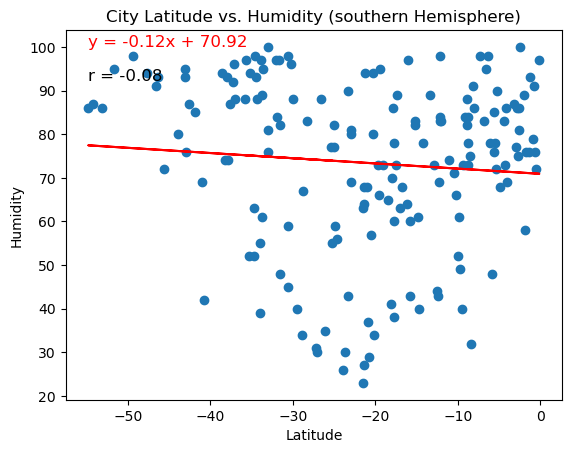

In [38]:
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Humidity"]
y_label = "Humidity"
x_label = "Latitude"
hemisphere = "southern"
figname = "output_data/southernHumidity"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

In [ ]:
**Discussion about the linear relationship:** Humidity vs. Latitude: There is no significant correlation between latitude and humidity in both the Northern and Southern Hemispheres. The regression lines are relatively flat, indicating that latitude alone is not a strong predictor of humidity.


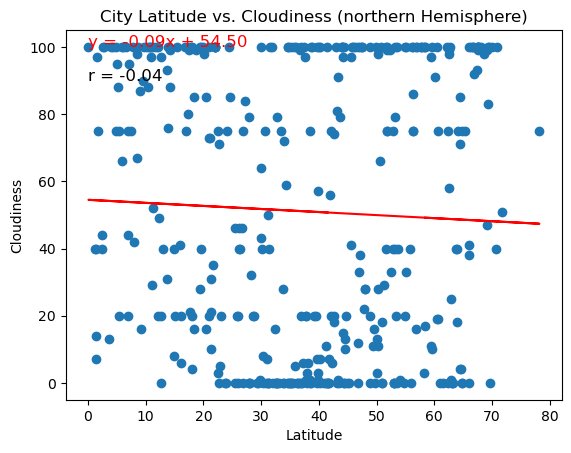

In [39]:
# Create scatter plots with linear regression lines
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
x_label = "Latitude"
hemisphere = "northern"
figname = "output_data/northernCloudiness"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

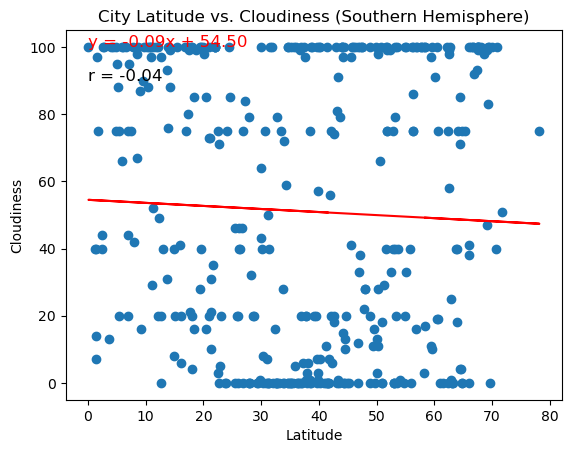

In [40]:
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
x_label = "Latitude"
hemisphere = "Southern"
figname = "output_data/SouthernCloudiness"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

In [ ]:
**Discussion about the linear relationship:**
Cloudiness vs. Latitude: There is no clear correlation between latitude and cloudiness in both hemispheres. The scatter plots show a wide distribution of cloudiness values across different latitudes.



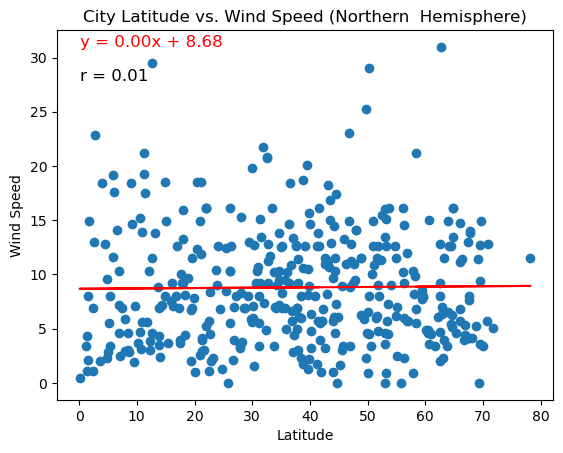

In [47]:
# Create scatter plots with linear regression lines
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
x_label = "Latitude"
hemisphere = "Northern "
figname = "output_data/Northern Wind Speed"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

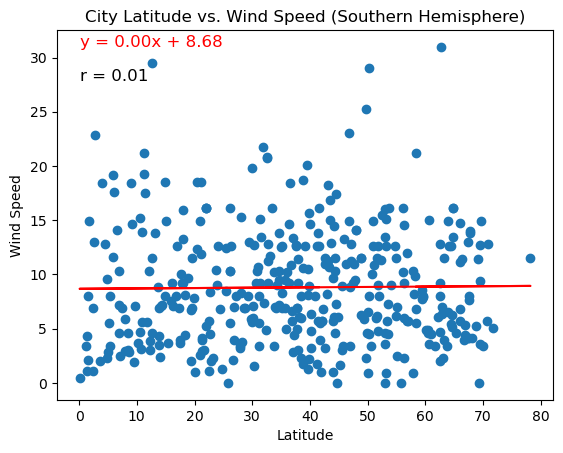

In [48]:
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
x_label = "Latitude"
hemisphere = "Southern"
figname = "output_data/Southern Wind Speed"

plot_regression(x, y, x_label, y_label, hemisphere, figname)

In [ ]:
Discussion about the linear relationship:Wind Speed vs. Latitude: Similar to humidity, there is no strong correlation between wind speed and latitude. The scatter plots show varied wind speeds at different latitudes.
